In [1]:
#BEGIN--------------------PROJECT-ROOT-PATH-APPENDING-------------------------#
import sys, os
REL_PROJECT_ROOT_PATH = "../../"
ABS_FILE_DIR = os.path.abspath(os.getcwd())
ABS_PROJECT_ROOT_PATH = os.path.normpath(os.path.join(ABS_FILE_DIR, REL_PROJECT_ROOT_PATH))
sys.path.append(ABS_PROJECT_ROOT_PATH)
#-------------------------PROJECT-ROOT-PATH-APPENDING----------------------END#

In [2]:
import sqlite3
import numpy as np
import pickle

from environments.tic_tac_toe.tic_tac_toe_engine import TicTacToeEngine

from reinforcement_learning.base.base_agent import BaseAgent
from reinforcement_learning.new_agents.random_agent.random_agent import RandomAgent
from reinforcement_learning.new_agents.n_step_agent.n_step_agent import NStepAgent
from reinforcement_learning.new_agents.dqn_agent.dqn_agent import DQNAgent

from reinforcement_learning.common.simple_training import SimpleTraining
from reinforcement_learning.new_agents.common.epsilon_strategy import ConstantEpsilonStrategy, CircleEpsilonStrategy, DecayingSinusEpsilonStrategy

from reinforcement_learning.agents_database.agents_db import AgentsDB

In [3]:
engine = TicTacToeEngine(2, 3, 3)

number_of_episodes = 100

hyper_epsilon_starting_value = 0.3
x = np.linspace(0, 10*np.pi, int(0.9*number_of_episodes))
y = np.abs((np.sin(x)/x)) * hyper_epsilon_starting_value
example_epsilon_iterator0 = iter(y)
example_epsilon_iterator1 = iter(y)

agents = [DQNAgent(step_size=0.01,
                  discount=1,
                  epsilon_strategy=CircleEpsilonStrategy(0.1, 0.7),
                  fit_period=64,
                  batch_size=64,
                  max_memory_size=64),
         DQNAgent(step_size=0.01,
                  discount=1,
                  epsilon_strategy=CircleEpsilonStrategy(0.1, 0.7),
                  fit_period=64,
                  batch_size=64,
                  max_memory_size=64)
         ]
agents = [
        NStepAgent(5, 0.1, CircleEpsilonStrategy(0.1, 0.7), 1),
        RandomAgent()
    ]


with SimpleTraining(engine, agents) as st:
    agents = st.train(number_of_episodes, 10000)

C:\Users\Jan\.virtualenvs\WinTacToe-Q23_xP5z\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Training platform has started!
Clients have joined server!
episode 0
Finished 100 episodes in 0.4730100631713867
Training platform has been shutdown!


In [4]:
AgentsDB.setup()

In [8]:
AgentsDB.save(agents[0], player=0, board_size=3, marks_required=3, description="ba")

In [9]:
a = AgentsDB.load(2)

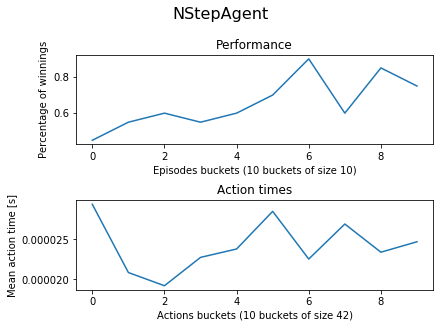

Mean reward: 0.310000
Mean action time: 0.000024


In [10]:
a